<a href="https://colab.research.google.com/github/hawkilol/parallelProg/blob/main/CPP_cad02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise performática do problema de Busca em Grafo com filas.

*=> **Abstract.** This article describes the development of a sequential application and their respective paralell version using the OpenMP and the OpenMPI library. It does also performance evaluations regarding the obtained performance of its paralell version in comparison to the sequential version, using both theoretical and practical methods for foundation. This work is done for the discipline of Special Topics in Parallel Programming of the bachelor's degree in Computer Science, taught by teacher Josivaldo de Souza Araújo.*

*=> **Resumo.** Este artigo descreve o desenvolvimento de uma aplicação sequencial e a sua respectiva versão paralela utilizando a biblioteca OpenMP e a OpenMPI. Também faz avaliações performáticas referentes à performance obtida da versão paralela em relação à versão sequencial, tanto usando de métodos teóricos quanto práticos para embasamento. Este trabalho é feito para a disciplina de Tópicos Especiais em Programação Paralela do curso de bacharelado da Ciência da Computação, ministrado pelo docente Josivaldo de Souza Araújo.*

In [ ]:
!apt list --installed

Listing... Done
adduser/focal,now 3.118ubuntu2 all [installed]
adwaita-icon-theme/focal-updates,now 3.36.1-2ubuntu0.20.04.2 all [installed,automatic]
apt-utils/focal-updates,now 2.0.9 amd64 [installed]
apt/focal-updates,now 2.0.9 amd64 [installed]
autoconf/focal,now 2.69-11.1 all [installed,automatic]
automake/focal,now 1:1.16.1-4ubuntu6 all [installed,automatic]
autotools-dev/focal,now 20180224.1 all [installed,automatic]
base-files/focal-updates,now 11ubuntu5.7 amd64 [installed]
base-passwd/focal,now 3.5.47 amd64 [installed]
bash/focal-updates,focal-security,now 5.0-6ubuntu1.2 amd64 [installed]
binutils-common/focal-updates,focal-security,now 2.34-6ubuntu1.6 amd64 [installed,automatic]
binutils-x86-64-linux-gnu/focal-updates,focal-security,now 2.34-6ubuntu1.6 amd64 [installed,automatic]
binutils/focal-updates,focal-security,now 2.34-6ubuntu1.6 amd64 [installed,automatic]
bsdmainutils/focal,now 11.1.2ubuntu3 amd64 [installed,automatic]
bsdutils/focal-security,now 1:2.34-0.1ubuntu9.3 a

### **1. Introdução**

A Computação Paralela é um paradigma da área da computação que foca na paralelização de tarefas sequenciais que são independentes de outros fatores na medida do possível. Por conseguinte, isso permite o ganho de performance considerável de um programa outrora construído de forma sequencial. É importante ressaltar, contudo, que essa solução requer ajustes próprios no código-fonte, que dependendo da complexidade, pode ser demasiado complexo, mas caso exista uma grande quantidade de processamento envolvido, pode ser viável e adequado a abordagem. Nesse contexto, este trabalho tem como objetivo a construção de um programa devidamente sequencial que requira considerável processamento teórico, e o desenvolvimento de dois programas paralelos com uso da biblioteca OpenMP e OpenMPI, respectivamente, utilizando de métodos da literatura para projetar o programa sequencial e paralelo, bem como avaliar determinadas métricas referentes à performance.


Nesse sentido, este trabalho será dividido nas seguintes seções: a Seção \ref{sec:2}, que descreverá o Estado da Arte contemporâneo referente à programação sequencial e paralela; a Seção \ref{sec:3}, que descreve o escopo do projeto, incluindo os objetivos geral e secundários; a Seção \ref{sec:4}, que descreverá as soluções algoritimicas utilizadas para o problema sequencial e seu respectivo mapeamento para um problema sequencial; a Seção \ref{sec:5}, que irá discorrer sobre os resultados práticos da execução do algoritmo em sua forma sequencial e paralela, para ambas as versões feitas pelo OpenMP e OpenMPI; e a Seção \ref{sec:6}, que irá apresentar as considerações finais diante do exposto pelo texto.

### **2. Estado da Arte (Cenário Sequencial e Paralelo)**

A Computação de Alto Desempenho (CAD) é um paradigma da área da computação que foca em utilizar o hardware e o software de tal forma que programas consigam ser executados de forma mais eficiente \cite{Ramos2021}. Assim sendo, problemas que anteriormente demandavam um tempo considerável para serem executados dentro do paradigma clássico da computação se tornam viáveis de serem solucionados com o uso do paradigma atual, permitindo a criação de um número cada vez maior de programas. É importante ressaltar, contudo, que essa solução requer investimentos significativos na área, apesar das dificuldades envolvidas. Nesse contexto, este trabalho tem como objetivo identificar duas aplicações de diferentes áreas que utilizam esse paradigma como solução para determinados problemas, destacando a necessidade do uso de CAD e da infraestrutura necessária para manter a aplicação em funcionamento.

Nesse sentido, este trabalho será dividido nas seguintes seções: a Seção \ref{sec:2}, que descreverão as aplicações de diferentes ramos que utilizam arquiteturas da Computação de Alto Desempenho como base na solução; e a Seção \ref{sec:3}, que enfatiza as considerações finais obtidas no desenvolvimento do trabalho.

In [ ]:
#OMP setup

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


### **3. Objetivos (Geral e Específicos)**

O tema definido para o desenvolvimento deste trabalho foi o **Processamento de Múltiplas Rotas de Veículos**.

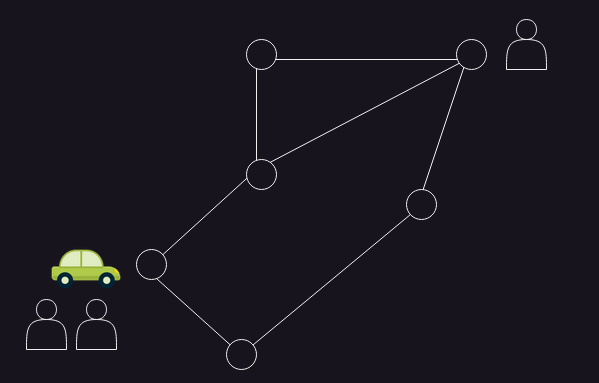

#### **3.1 Objetivo Geral**
Implementação de um algoritmo que faz o processamento de rotas JIT referentes à determinação de um caminho ótimo entre dois locais.

#### **3.2 Objetivos Específicos**
Desenvolvimento da versão sequencial e da versão paralela referente aos algoritmos utilizados para resolver o problema.

Avaliar por meio da análise de tempo e por metodologias da literatura a performance teórica e prática.

### **4. Metodologia**

#### **4.1 Metodologia Sequencial**
A metodologia utilizada para o desenvolvimento do projeto em questão foi, em geral, a utilização de algoritmos clássicos para resolver os problemas referentes à escolha das consultas geradas ao programa e à solução do problema de encontrar um caminho ótimo considerando o uso de heurísticas adeuquadas e de memória suficiente para o domínio do problema. No entanto, ressalta-se que, devido à restrição do número de threads disponíveis, foi limitado alguma coisa né.

Para resolver os problemas oriundos do programa sequencial, foram empregados certas estratégias:
- Para o grafo que representa a rota em que o usuário se encontra até o ponto destino, se utilizou o algoritmo A*, isto é, uma modificação do algoritmo de Dijkstra otimizado para um único local, evitando acessar todos os outros nós do grafo, utilizando uma heurística de distância para evitar custos elevados.
- Pelo fato de que váriasPara o grafo que representa a rota em que o usuário se encontra até o ponto destino, se utilizou o algoritmo A*, isto é, uma modificação do algoritmo de Dijkstra otimizado para um único local, evitando acessar todos os outros nós do grafo, utilizando uma heurística de distância para evitar custos elevados.
- lsanvbksankvbajvsabbasbj grafos foram gerados de forma randômica uafguasgufsagifgasigfsajihfaiush.


#### **4.2 Metodologia Paralela**
Existem diversas maneiras de paralelizar um programa originalmente sequencial dado o conhecimento específico do problema, desde paralelização de tarefas repetitivas sem dependências até a reestruturação do algoritmo base. Uma das estratégias mais simples e conhecidas é a metodologia de Foster, também conhecido como método PCAM, que possui foco na paralelização do código mediante diminuição das dependências e estabelecimento de comunicação entre processos, possibilitando múltiplos processos executar efetivamente o código paralelo enquanto se comunicando apenas na medida do possível. Para isso, foca na atomização das tarefas, no estabelecimento apenas da comunicação necessário entre essas tarefas, no agrupamento dessas comunicações em grupos lógicos de tarefas, e outro agrupamento seguido de mapeamento para os processadores da máquina em questão, que por ser limitado na quantidade de recursos, pode não suprir o primeiro agrupamento.

Utilizando essa metodologia no programa sequencial em questão,


In [ ]:
%%writefile astar.cpp
#include <iostream>
#include <vector>
#include <queue>
#include <cmath>
#include <algorithm>
#include <unordered_set>
#define N 10000

struct Node
{
    int index;
    double g;
    double h;
    double f;
    std::vector<Node *> neighbors;
    Node *parent;

    Node(int index_) : index(index_), g(0), h(0), f(0), parent(nullptr) {}

    double getDistance(Node *other) const
    {
        return std::abs(index - other->index);
    }
};

struct CompareNodes
{
    bool operator()(const Node *a, const Node *b) const
    {
        return a->f > b->f;
    }
};

std::vector<Node *> astar(Node *start, Node *goal)
{
    std::priority_queue<Node *, std::vector<Node *>, CompareNodes> openSet;
    std::unordered_set<Node *> closedSet;

    start->g = 0;
    start->h = start->getDistance(goal);
    start->f = start->h;
    openSet.push(start);

    while (!openSet.empty())
    {
        Node *current = openSet.top();
        openSet.pop();

        if (current == goal)
        {
            std::vector<Node *> path;
            Node *node = current;
            while (node != nullptr)
            {
                path.push_back(node);
                node = node->parent;
            }
            return path;
        }

        closedSet.insert(current);

        for (Node *neighbor : current->neighbors)
        {
            if (closedSet.find(neighbor) != closedSet.end())
            {
                continue;
            }

            double gScore = current->g + current->getDistance(neighbor);
            bool isNewPath = false;

            bool inOpenSet = false;
            std::priority_queue<Node *, std::vector<Node *>, CompareNodes> tempOpenSet = openSet;

            while (!tempOpenSet.empty())
            {
                Node *openNode = tempOpenSet.top();
                tempOpenSet.pop();

                if (openNode == neighbor)
                {
                    inOpenSet = true;
                    break;
                }
            }

            if (!inOpenSet)
            {
                openSet.push(neighbor);
                isNewPath = true;
            }
            else if (gScore < neighbor->g)
            {
                isNewPath = true;
            }

            if (isNewPath)
            {
                neighbor->parent = current;
                neighbor->g = gScore;
                neighbor->h = neighbor->getDistance(goal);
                neighbor->f = neighbor->g + neighbor->h;
            }
        }
    }

    return std::vector<Node *>();
}

void achaDiagonal()
{
    std::vector<Node *> nodes;

    // Criando os nós
    for (int i = 0; i < N * N; i++)
    {
        nodes.push_back(new Node(i));
    }

    // Definindo os vizinhos de cada nó
    Node *node = nodes[0];
    for (int i = 0; i < N; ++i)
    {
        for (int c = 0; c < N; c++)
        {
            if (i == 0)
            {
                break;
            }

            if (i == c)
            {
                node->neighbors.push_back(nodes[i * N + c]);
                node = nodes[i * N + c];
            }
        }
    }

    // Definindo o nó inicial e o nó final
    Node *initialNode = nodes[0];
    Node *finalNode = nodes[(N - 1) * N + N - 1];

    // Executando o algoritmo A*
    std::vector<Node *> path = astar(initialNode, finalNode);

    // Exibindo o caminho encontrado
    if (!path.empty())
    {
        std::cout << "Caminho encontrado:" << std::endl;
        for (auto it = path.rbegin(); it != path.rend(); ++it)
        {
            Node *node = *it;
            std::cout << "Índice: " << node->index << std::endl;
        }
    }
    else
    {
        std::cout << "Não foi possível encontrar um caminho até o objetivo." << std::endl;
    }

    // Liberando a memória dos nós
    for (Node *node : nodes)
    {
        delete node;
    }
}

void caminhoL()
{
    std::vector<Node *> nodes;

    // Criando os nós
    for (int i = 0; i < N * N; i++)
    {
        nodes.push_back(new Node(i));
    }

    // Definindo os vizinhos de cada nó
    Node *node = nodes[0];
    for (int l = 0; l < N; ++l)
    {
        for (int c = 0; c < N; c++)
        {
            if (l == 0)
            {
                node->neighbors.push_back(nodes[l * N + c]);
                node = nodes[l * N + c];
            }
            else if (c == N - 1)
            {
                node->neighbors.push_back(nodes[l * N + c]);
                node = nodes[l * N + c];
            }
        }
    }

    // Definindo o nó inicial e o nó final
    Node *initialNode = nodes[0];
    Node *finalNode = nodes[(N - 1) * N + N - 1];

    // Executando o algoritmo A*
    std::vector<Node *> path = astar(initialNode, finalNode);

    // Exibindo o caminho encontrado
    if (!path.empty())
    {
        std::cout << "Caminho encontrado:" << std::endl;
        for (auto it = path.rbegin(); it != path.rend(); ++it)
        {
            Node *node = *it;
            std::cout << "Índice: " << node->index << std::endl;
        }
    }
    else
    {
        std::cout << "Não foi possível encontrar um caminho até o objetivo." << std::endl;
    }

    // Liberando a memória dos nós
    for (Node *node : nodes)
    {
        delete node;
    }
}

int main()
{
    achaDiagonal();
    caminhoL();
    return 0;
}

Writing astar.cpp


In [ ]:
!g++ astar.cpp -o astar && ./astar

A saída de streaming foi truncada nas últimas 5000 linhas.
Índice: 50009999
Índice: 50019999
Índice: 50029999
Índice: 50039999
Índice: 50049999
Índice: 50059999
Índice: 50069999
Índice: 50079999
Índice: 50089999
Índice: 50099999
Índice: 50109999
Índice: 50119999
Índice: 50129999
Índice: 50139999
Índice: 50149999
Índice: 50159999
Índice: 50169999
Índice: 50179999
Índice: 50189999
Índice: 50199999
Índice: 50209999
Índice: 50219999
Índice: 50229999
Índice: 50239999
Índice: 50249999
Índice: 50259999
Índice: 50269999
Índice: 50279999
Índice: 50289999
Índice: 50299999
Índice: 50309999
Índice: 50319999
Índice: 50329999
Índice: 50339999
Índice: 50349999
Índice: 50359999
Índice: 50369999
Índice: 50379999
Índice: 50389999
Índice: 50399999
Índice: 50409999
Índice: 50419999
Índice: 50429999
Índice: 50439999
Índice: 50449999
Índice: 50459999
Índice: 50469999
Índice: 50479999
Índice: 50489999
Índice: 50499999
Índice: 50509999
Índice: 50519999
Índice: 50529999
Índice: 50539999
Índice: 50549999
Índice

In [ ]:
%env OMP_NUM_THREADS=4

env: OMP_NUM_THREADS=4


In [ ]:
#MPI

In [ ]:
%%writefile astarParalel.cpp
#include <iostream>
#include <vector>
#include <queue>
#include <cmath>
#include <algorithm>
#include <unordered_set>
#include <omp.h>

#define N 10000

struct Node
{
    int index;
    double g;
    double h;
    double f;
    std::vector<Node *> neighbors;
    Node *parent;

    Node(int index_) : index(index_), g(0), h(0), f(0), parent(nullptr) {}

    double getDistance(Node *other) const
    {
        return std::abs(index - other->index);
    }
};

struct CompareNodes
{
    bool operator()(const Node *a, const Node *b) const
    {
        return a->f > b->f;
    }
};

std::vector<Node *> astar(Node *start, Node *goal)
{
    std::priority_queue<Node *, std::vector<Node *>, CompareNodes> openSet;
    std::unordered_set<Node *> closedSet;

    start->g = 0;
    start->h = start->getDistance(goal);
    start->f = start->h;
    openSet.push(start);

    while (!openSet.empty())
    {
        Node *current = openSet.top();
        openSet.pop();

        if (current == goal)
        {
            std::vector<Node *> path;
            Node *node = current;
            while (node != nullptr)
            {
                path.push_back(node);
                node = node->parent;
            }
            return path;
        }

        closedSet.insert(current);

        #pragma omp parallel num_threads(8)
        {
            std::vector<Node *> localOpenSet;
            #pragma omp for
            for (int i = 0; i < current->neighbors.size(); ++i)
            {
                Node *neighbor = current->neighbors[i];

                if (closedSet.find(neighbor) != closedSet.end())
                {
                    continue;
                }

                double gScore = current->g + current->getDistance(neighbor);
                bool isNewPath = false;

                #pragma omp critical
                {
                    if (std::find(localOpenSet.begin(), localOpenSet.end(), neighbor) == localOpenSet.end())
                    {
                        localOpenSet.push_back(neighbor);
                        isNewPath = true;
                    }
                    else if (gScore < neighbor->g)
                    {
                        isNewPath = true;
                    }
                }

                if (isNewPath)
                {
                    neighbor->parent = current;
                    neighbor->g = gScore;
                    neighbor->h = neighbor->getDistance(goal);
                    neighbor->f = neighbor->g + neighbor->h;
                }
            }

            #pragma omp critical
            {
                for (Node *neighbor : localOpenSet)
                {
                    openSet.push(neighbor);
                }
            }
        }
    }

    return std::vector<Node *>();
}
void achaDiagonal(bool exibirCaminho = false)
{
    std::vector<Node *> nodes;

    // Criando os nós
    for (int i = 0; i < N * N; i++)
    {
        nodes.push_back(new Node(i));
    }

    // Definindo os vizinhos de cada nó
    Node *node = nodes[0];
    for (int i = 0; i < N; ++i)
    {
        for (int c = 0; c < N; c++)
        {
            if (i == 0)
            {
                break;
            }

            if (i == c)
            {
                node->neighbors.push_back(nodes[i * N + c]);
                node = nodes[i * N + c];
            }
        }
    }

    // Definindo o nó inicial e o nó final
    Node *initialNode = nodes[0];
    Node *finalNode = nodes[(N - 1) * N + N - 1];

    // Executando o algoritmo A*
    std::vector<Node *> path = astar(initialNode, finalNode);

    if (exibirCaminho)
    {
        // Exibindo o caminho encontrado
        if (!path.empty())
        {
            std::cout << "Caminho encontrado:" << std::endl;
            for (auto it = path.rbegin(); it != path.rend(); ++it)
            {
                Node *node = *it;
                std::cout << "Índice: " << node->index << std::endl;
            }
        }
        else
        {
            std::cout << "Não foi possível encontrar um caminho até o objetivo." << std::endl;
        }
    }

    // Liberando a memória dos nós
    for (Node *node : nodes)
    {
        delete node;
    }
}

void caminhoL(bool exibirCaminho = false)
{
    std::vector<Node *> nodes;

    // Criando os nós
    for (int i = 0; i < N * N; i++)
    {
        nodes.push_back(new Node(i));
    }

    // Definindo os vizinhos de cada nó
    Node *node = nodes[0];
    for (int l = 0; l < N; ++l)
    {
        for (int c = 0; c < N; c++)
        {
            if (l == 0)
            {
                node->neighbors.push_back(nodes[l * N + c]);
                node = nodes[l * N + c];
            }
            else if (c == N - 1)
            {
                node->neighbors.push_back(nodes[l * N + c]);
                node = nodes[l * N + c];
            }
        }
    }

    // Definindo o nó inicial e o nó final
    Node *initialNode = nodes[0];
    Node *finalNode = nodes[(N - 1) * N + N - 1];

    // Executando o algoritmo A*
    std::vector<Node *> path = astar(initialNode, finalNode);

    if (exibirCaminho)
    {
        // Exibindo o caminho encontrado
        if (!path.empty())
        {
            std::cout << "Caminho encontrado:" << std::endl;
            for (auto it = path.rbegin(); it != path.rend(); ++it)
            {
                Node *node = *it;
                std::cout << "Índice: " << node->index << std::endl;
            }
        }
        else
        {
            std::cout << "Não foi possível encontrar um caminho até o objetivo." << std::endl;
        }
    }

    // Liberando a memória dos nós
    for (Node *node : nodes)
    {
        delete node;
    }
}

int main(int argc, char const *argv[])
{
    //achaDiagonal();
    long time;
    for (int i = 0; i < 5; i++)
    {
        long time = omp_get_wtime();
        caminhoL();
        printf("Tempo: %.4f\n", omp_get_wtime() - time);
    }
    return 0;
}


Writing astarParalel.cpp


In [ ]:
!g++ -fopenmp astarParalel.cpp -o astarParalel && ./astarParalel

Tempo: 22.5069
^C


In [ ]:
#MPi2

In [ ]:
%%writefile astarMPI.cpp
#include <iostream>
#include <vector>
#include <queue>
#include <cmath>
#include <algorithm>
#include <unordered_set>
#include <mpi.h>

struct Node
{
    int index;
    double g;
    double h;
    double f;
    std::vector<Node *> neighbors;
    Node *parent;
    bool isPath; // Flag to indicate if the node is part of the path

    Node(int index_) : index(index_), g(0), h(0), f(0), parent(nullptr), isPath(false) {}

    double getDistance(Node *other) const
    {
        return std::abs(index - other->index);
    }
};

struct CompareNodes
{
    bool operator()(const Node *a, const Node *b) const
    {
        return a->f > b->f;
    }
};

std::vector<Node *> astar(Node *start, Node *goal, int rank, int numProcesses)
{
    std::priority_queue<Node *, std::vector<Node *>, CompareNodes> openSet;
    std::unordered_set<Node *> closedSet;

    start->g = 0;
    start->h = start->getDistance(goal);
    start->f = start->h;
    openSet.push(start);

    while (!openSet.empty())
    {
        Node *current = openSet.top();
        openSet.pop();

        if (current == goal)
        {
            std::vector<Node *> path;
            Node *node = current;
            while (node != nullptr)
            {
                path.push_back(node);
                node = node->parent;
            }
            return path;
        }

        closedSet.insert(current);

        std::vector<Node *> localOpenSet;
        for (int i = 0; i < current->neighbors.size(); ++i)
        {
            Node *neighbor = current->neighbors[i];

            if (closedSet.find(neighbor) != closedSet.end())
            {
                continue;
            }

            double gScore = current->g + current->getDistance(neighbor);
            bool isNewPath = false;

            if (std::find(localOpenSet.begin(), localOpenSet.end(), neighbor) == localOpenSet.end())
            {
                localOpenSet.push_back(neighbor);
                isNewPath = true;
            }
            else if (gScore < neighbor->g)
            {
                isNewPath = true;
            }

            if (isNewPath)
            {
                neighbor->parent = current;
                neighbor->g = gScore;
                neighbor->h = neighbor->getDistance(goal);
                neighbor->f = neighbor->g + neighbor->h;
            }
        }

        std::vector<int> localOpenSetCounts(numProcesses), localOpenSetDispls(numProcesses);
        int localOpenSetCount = localOpenSet.size();
        MPI_Allgather(&localOpenSetCount, 1, MPI_INT, localOpenSetCounts.data(), 1, MPI_INT, MPI_COMM_WORLD);

        int totalOpenSetCount = 0;
        for (int i = 0; i < numProcesses; ++i)
        {
            totalOpenSetCount += localOpenSetCounts[i];
            if (i > 0)
                localOpenSetDispls[i] = localOpenSetDispls[i - 1] + localOpenSetCounts[i - 1];
        }
        localOpenSetDispls[0] = 0;

        std::vector<Node *> mergedOpenSet;
        mergedOpenSet.resize(localOpenSetDispls[numProcesses - 1] + localOpenSetCounts[numProcesses - 1]);
        MPI_Allgatherv(localOpenSet.data(), localOpenSetCount, MPI_UNSIGNED_LONG_LONG, mergedOpenSet.data(),
                       localOpenSetCounts.data(), localOpenSetDispls.data(), MPI_UNSIGNED_LONG_LONG, MPI_COMM_WORLD);

        for (Node *neighbor : mergedOpenSet)
        {
            openSet.push(neighbor);
        }
    }

    return std::vector<Node *>();
}

void printGrid(const std::vector<Node *> &grid, int gridSize)
{
    for (int i = 0; i < gridSize; ++i)
    {
        for (int j = 0; j < gridSize; ++j)
        {
            int index = i * gridSize + j;
            if (grid[index]->isPath)
            {
                std::cout << "* "; // Character to represent the path
            }
            else
            {
                std::cout << ". "; // Character to represent empty space
            }
        }
        std::cout << std::endl;
    }
}

void distributeWorkload(const std::vector<Node *> &nodes, int gridSize, int numProcesses)
{
    const int gridSizePerProcess = gridSize / numProcesses;
    const int extraGridSize = gridSize % numProcesses;

    int startIndex = 0;
    int endIndex = 0;

    for (int rank = 0; rank < numProcesses; ++rank)
    {
        startIndex = endIndex;
        endIndex = startIndex + gridSizePerProcess;

        if (rank < extraGridSize)
        {
            endIndex++;
        }

        for (int i = startIndex; i < endIndex; ++i)
        {
            Node *currentNode = nodes[i];

            // Assign neighbors within the assigned portion of the grid
            int row = i / gridSize;
            int col = i % gridSize;

            if (row > 0)
            {
                currentNode->neighbors.push_back(nodes[(row - 1) * gridSize + col]);
            }
            if (row < gridSize - 1)
            {
                currentNode->neighbors.push_back(nodes[(row + 1) * gridSize + col]);
            }
            if (col > 0)
            {
                currentNode->neighbors.push_back(nodes[row * gridSize + (col - 1)]);
            }
            if (col < gridSize - 1)
            {
                currentNode->neighbors.push_back(nodes[row * gridSize + (col + 1)]);
            }
        }
    }
}

void performLoadBalancing(std::vector<Node *> &nodes, int numProcesses)
{
    std::vector<int> workload(numProcesses);
    std::vector<int> localOpenSetCounts(numProcesses);
    int gridSize = nodes.size();
    int localOpenSetCount = 0;

    // Calculate the local open set size for each process
    for (int i = 0; i < gridSize; ++i)
    {
        if (!nodes[i]->neighbors.empty())
        {
            localOpenSetCount++;
        }
    }

    MPI_Allgather(&localOpenSetCount, 1, MPI_INT, localOpenSetCounts.data(), 1, MPI_INT, MPI_COMM_WORLD);

    // Calculate the workload for each process
    for (int rank = 0; rank < numProcesses; ++rank)
    {
        workload[rank] = localOpenSetCounts[rank];
    }

    // Calculate the average workload
    int totalWorkload = 0;
    for (int rank = 0; rank < numProcesses; ++rank)
    {
        totalWorkload += workload[rank];
    }
    double averageWorkload = static_cast<double>(totalWorkload) / numProcesses;

    // Adjust the workload by redistributing tasks if necessary
    for (int rank = 0; rank < numProcesses; ++rank)
    {
        if (workload[rank] > averageWorkload)
        {
            int excessWorkload = workload[rank] - averageWorkload;
            int targetRank = (rank + 1) % numProcesses;

            while (excessWorkload > 0)
            {
                int gridSize = nodes.size();
                for (int i = 0; i < gridSize; ++i)
                {
                    Node *currentNode = nodes[i];

                    if (currentNode->neighbors.empty() && targetRank == rank)
                    {
                        currentNode->neighbors.push_back(nodes[i - 1]);
                        excessWorkload--;
                        if (excessWorkload == 0)
                            break;
                    }
                    else if (!currentNode->neighbors.empty() && targetRank == rank)
                    {
                        currentNode->neighbors.clear();
                        excessWorkload--;
                        if (excessWorkload == 0)
                            break;
                    }
                }
                targetRank = (targetRank + 1) % numProcesses;
            }
        }
    }
}

int main(int argc, char **argv)
{
    int rank, numProcesses;
    MPI_Init(&argc, &argv);
    MPI_Comm_size(MPI_COMM_WORLD, &numProcesses);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    std::vector<Node *> nodes;
    const int gridSize = 10; // Adjust the grid size as per your requirement

    if (rank == 0)
    {
        // Creating the nodes
        for (int i = 0; i < gridSize * gridSize; ++i)
        {
            nodes.push_back(new Node(i));
        }
    }

    distributeWorkload(nodes, gridSize, numProcesses);

    performLoadBalancing(nodes, numProcesses);

    // Defining the initial and final nodes
    Node *initialNode = nodes[0];
    Node *finalNode = nodes[gridSize - 1];

    // Executing the A* algorithm
    std::vector<Node *> path = astar(initialNode, finalNode, rank, numProcesses);

    // Marking the nodes in the path
    for (Node *node : path)
    {
        node->isPath = true;
    }
    // Display the found path
    if (!path.empty() && rank == 0)
    {
        std::cout << "Path found:" << std::endl;
        for (auto it = path.rbegin(); it != path.rend(); ++it)
        {
            Node *node = *it;
            std::cout << "Index: " << node->index << std::endl;
        }
    }
    else if (rank == 0)
    {
        std::cout << "Unable to find a path to the goal." << std::endl;
    }

    // Printing the grid with the path
    if (rank == 0)
    {
        printGrid(nodes, gridSize);
    }

    // Freeing the memory of the nodes
    for (Node *node : nodes)
    {
        delete node;
    }

    MPI_Finalize();

    return 0;
}


Overwriting astarMPI.cpp


In [ ]:
%env OMPI_ALLOW_RUN_AS_ROOT=1
%env OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1

env: OMPI_ALLOW_RUN_AS_ROOT=1
env: OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1


In [ ]:
!mpic++ astarMPI.cpp -o mpi
!mpiexec -n 1 ./mpi

Path found:
Index: 0
Index: 1
Index: 2
Index: 3
Index: 4
Index: 5
Index: 6
Index: 7
Index: 8
Index: 9
* * * * * * * * * * 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 


### **5. Resultados**

A Computação de Alto Desempenho (CAD) é um paradigma da área da computação que foca em utilizar o hardware e o software de tal forma que programas consigam ser executados de forma mais eficiente \cite{Ramos2021}. Assim sendo, problemas que anteriormente demandavam um tempo considerável para serem executados dentro do paradigma clássico da computação se tornam viáveis de serem solucionados com o uso do paradigma atual, permitindo a criação de um número cada vez maior de programas. É importante ressaltar, contudo, que essa solução requer investimentos significativos na área, apesar das dificuldades envolvidas. Nesse contexto, este trabalho tem como objetivo identificar duas aplicações de diferentes áreas que utilizam esse paradigma como solução para determinados problemas, destacando a necessidade do uso de CAD e da infraestrutura necessária para manter a aplicação em funcionamento.

Nesse sentido, este trabalho será dividido nas seguintes seções: a Seção \ref{sec:2}, que descreverão as aplicações de diferentes ramos que utilizam arquiteturas da Computação de Alto Desempenho como base na solução; e a Seção \ref{sec:3}, que enfatiza as considerações finais obtidas no desenvolvimento do trabalho.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:


header = ['sequencial', 'omp 1', 'omp 2', 'omp 3', 'omp 4', 'omp 5', 'omp 6', 'omp 7', 'omp 8']


In [ ]:
data = [[
np.mean([0.3014,0.3246,0.3465,0.3690,0.3891]),
np.mean([0.1921,0.2273,0.2609,0.2943,0.3291]),
np.mean([0.3637,0.4020,0.4393,0.4787,0.5162]),
np.mean([0.0792,0.1213,0.1626,0.2050,0.2470]),
np.mean([0.9189,0.9647,1.0103,0.0568,0.1034]),
np.mean([0.4866,0.5433,0.6006,0.6591,0.7183]),
np.mean([0.5966,0.6766,0.7532,0.8244,0.8977]),
np.mean([0.5712,0.6494,0.7274,0.8014,0.8767]),
np.mean([0.9027,1.0198,0.1488,0.3580,0.4995])
]]

In [ ]:

df = pd.DataFrame(data, columns=header)
df

,sequencial,omp 1,omp 2,omp 3,omp 4,omp 5,omp 6,omp 7,omp 8
0,0.34612,0.26074,0.43998,0.16302,0.61082,0.60158,0.7497,0.72522,0.58576


#### **5.1 Speedup**
Os fatores que limitam o desempenho e a escalabilidade de uma aplicação estão
ligados a limites arquiteturais e limites algorítmicos. Entre os limites arquiteturais temos a latência e a largura de banda da camada de interconexão e capacidade de memória da máquina utilizada. Já os limites algorítmicos incluem a própria falta de paralelismo inerente ao algoritmo, usualmente capturado através da análise de dependência de dados. Além disso, tem-se a frequência de comunicação, representada pelo acesso às variáveis compartilhadas ou passagem de mensagens; a frequência de sincronização, normalmente imposta pelo algoritmo, e o escalonamento deficiente, que depende da granularidade das tarefas e do consequente balanceamento de carga a ser efetuado pelo sistema de execução.
A medida básica para a comparação e análise entre versões é o tempo de execução. Na fase de análise já utilizou-se medida de tempo semelhante para detectação dos hot spots do programa. Agora, deseja-se saber o quanto o sistema A é mais rápido que o sistema B. Esta medida é dada por:

n = Texec(A) / Texec(B).

Baseando-se neste cálculo é possível obter-se o ganho de tempo ou speedup de
um programa paralelo, uma das medidas mais populares para avaliar-se o desempenho de tais aplicações:

Speedup(P) = Texec(1 proc) / Texec(P procs)bb

○ Onde P = número de processadores
○ 1 ≤ Speedup ≤ P

Apesar do Speedup apresentar os limites teóricos de 1 e P, eventualmente
podem-se encontrar valores fora desta faixa, como, por exemplo, no caso de uma otimização mal sucedida, onde a nova versão do código apresenta desempenho inferior a versão serial, obtendo assim um speedup menor do que 1. Caso a nova versão favoreça o acesso dos dados em memória cache (o que é sempre desejável), devido a
um melhor dimensionamento do domínio do problema na versão paralela, o Speedup
pode ser super-linear, e assim atingir valores superiores à P.
Outra medida importante é a eficiência, que indica o uso dos processadores. A
eficiência pode ser calculada da seguinte forma:

Eficiência(P) = Speedup(P) / Pbb

○ Onde 0 < Eficiência ≤ 1

Existe uma limitação clássica para o speedup conhecida como Lei de Amdhal (Amdhal, 1967). Basicamente, o conhecido autor dividiu o problema em duas categorias de trechos de código: aqueles que podem ser paralelizados (fração paralela) e aqueles que não podem (fração serial). A fração serial é principalmente limitada em função da análise de dependência de dados. Assim, a fração serial sempre será o limite inferior do tempo de execução, não importando o aumento dos recursos computacionais utilizados pela parte paralela.
Vale salientar que a Lei de Amdhal considera apenas a escalabilidade dos recursos computacionais, sendo o tamanho do problema fixo.


In [ ]:
# Lei de Amdahl
tempo_proc = []
for i in range(0, 4):
  tempo_proc.append(tempo)

speedup = []
for i in range(0, 4):
  speedup_calc = tempo_1_proc/tempo_n_procs
  speedup.append(speedup_calc)

speedup = []
for i in range(0, 4):
  speedup_calc = tempo_1_proc/tempo_n_procs
  speedup.append(speedup_calc)

performance = []
for i in range(0, 4):
  performance_calc = tempo_1_proc/tempo_n_procs
  performance.append(performance)

NameError: ignored

In [ ]:
# Data for plotting
num_nucleos = ['1', '2', '3', '4']
tempo_proc = [35, 22, 16, 14]

fig, ax = plt.subplots()
ax.plot(num_nucleos, tempo_proc)

ax.set(xlabel='Nº de Núcleos', ylabel='Tempo de Processamento (s)')
ax.grid(axis='y')

plt.show()

In [ ]:
# Data for plotting
num_nucleos = ['1', '2', '3', '4']
speedup = [1, 1.59, 2.13, 2.38]

fig, ax = plt.subplots()
ax.plot(num_nucleos, tempo_proc)

ax.set(xlabel='Nº de Núcleos', ylabel='Speedup')
ax.grid(axis='y')

plt.show()

#### **5.2 Eficiência**

Neste caso, efetivamente temos limitação do speedup que uma aplicação paralela poderá obter. Em contra partida, temos a Lei de Gustafson-Barsis (Gustafson, 1988) que parte da premissa que toda aplicação tem uma fração inerentemente serial e que para se obter escalabilidade é necessário aumentar o tamanho da aplicação ou do domínio a medida que se aumentam o número de recursos computacionais.
Assim, pode-se definir dois tipos de escalabilidade:
● Escalabilidade forte: mantém-se o tamanho do problema e escala-se o número de processadores; é a capacidade de executar aplicações n vezes mais rápidas,
onde n é a quantidade de processadores utilizados ( speedup).
● Escalabilidade fraca: escala-se o tamanho do problema juntamente com o
número de processadores; é a capacidade de aumentar a carga de trabalho e a
quantidade de processadores por um fator de n e manter o tempo de computação.

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

num_nucleos = ['1', '2', '3', '4']
eficiencia = [1, 0.9, 0.8, 0.7]

ax.bar(num_nucleos, eficiencia)

ax.set_xlabel('Nº de Núcleos (cores)')
ax.set_ylabel('Eficiência')

plt.show()

#### **5.3 Desempenho**


In [ ]:
np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
num_nucleos = ('1', '2', '3', '4')
eficiencia = np.arange(len(num_nucleos))
performance = 100 * np.random.rand(len(num_nucleos))

ax.barh(eficiencia, performance, align='center')
ax.set_yticks(eficiencia, labels=num_nucleos)
ax.set_xlabel('Desempenho (%)')
ax.set_ylabel('Nº de Núcleos (cores)')

plt.show()

**6. Conclusão**



    MPI_Init: This function initializes the MPI environment, allowing processes to establish communication channels and coordinate with each other.

    MPI_Comm_size and MPI_Comm_rank: These functions are used to determine the number of processes involved in the computation (MPI_Comm_size) and to obtain the rank or identifier of the current process (MPI_Comm_rank). The rank is typically used to differentiate the behavior or workload assigned to each process.

    MPI_Allgather: This function performs a collective communication operation where each process shares its local data with all other processes. In the code, it is used to gather the count of local open set sizes from all processes. This information is crucial for determining the total count of open sets across all processes, which aids load balancing and work distribution.

    MPI_Allgatherv: Similar to MPI_Allgather, this function performs a collective communication operation, but it allows different-sized data to be gathered from each process. In the code, it is used to gather the local open sets from all processes into a merged open set. By sharing these open sets, the processes can collectively update the priority queue of nodes for the A* algorithm. This helps in coordinating the exploration of the search space across multiple processes and making progress towards finding the optimal path.








    distributeWorkload(): This function is responsible for partitioning the workload among different processes. It divides the grid into equal-sized portions and assigns the neighbors of each node accordingly. Each process will only have access to a subset of nodes and their corresponding neighbors.

    performLoadBalancing(): This function ensures that the workload is evenly distributed among processes by redistributing tasks if necessary. It calculates the workload of each process based on the number of neighbors and adjusts it by redistributing tasks from overloaded processes to underloaded ones.

By incorporating these techniques, the code achieves workload partitioning, load balancing, and dynamic task distribution among multiple processes using MPI.



In the modified code, the Parallel Computing and Mapping (PCAM) approach is applied through the use of MPI (Message Passing Interface) to enable parallel execution and distribution of computation among multiple processes or nodes.

Here's an overview of how PCAM is applied in the code:

    Workload Partitioning:
        The distributeWorkload() function divides the grid of nodes into equal-sized portions based on the number of processes. Each process is assigned a subset of nodes and their corresponding neighbors.
        The workload is evenly distributed among processes, ensuring that each process has a balanced amount of work to perform.

    Load Balancing:
        The performLoadBalancing() function adjusts the workload distribution by redistributing tasks if necessary.
        It calculates the workload of each process based on the number of neighbors assigned to the process.
        If a process has an excess workload compared to the average workload, it redistributes tasks by either assigning additional neighbors or removing existing neighbors.
        The load balancing process continues until the workload is balanced across all processes.

    Dynamic Task Distribution:
        During the A* algorithm execution, each process independently performs its portion of the A* search on its assigned nodes and their neighbors.
        After processing its assigned nodes, each process gathers the local open set (nodes with potential paths) and performs an MPI_Allgatherv operation to merge the local open sets from all processes into a global open set.
        The merged open set is then used to update the priority queue, allowing each process to access the potentially optimal nodes for expansion in a distributed manner.

Overall, PCAM in this code enables the workload to be partitioned among multiple processes, balances the workload distribution across processes, and dynamically distributes tasks through message passing operations, facilitating parallel and efficient execution of the A* algorithm





O processo de balanceamento de carga utilizando PCAM ocorre da seguinte maneira:

    Cálculo da carga local: Cada processo conta quantos nós locais possuem vizinhos (localOpenSetCount), ou seja, quantas tarefas ele possui para processar.

    Coleta das cargas locais: A função MPI_Allgather é utilizada para coletar as cargas locais de todos os processos, armazenando-as no vetor localOpenSetCounts.

    Cálculo da carga média: A carga média é calculada dividindo-se a carga total entre o número de processos. Isso é feito somando todas as cargas locais.

    Ajuste da carga: O algoritmo percorre os processos e verifica se algum deles possui uma carga maior do que a média. Se isso ocorrer, o processo com excesso de carga é identificado e tarefas são redistribuídas para os processos subsequentes, de forma a reduzir a carga excessiva. Esse processo continua até que a carga média seja alcançada por todos os processos.

No código fornecido, o ajuste da carga é realizado percorrendo os nós e modificando a lista de vizinhos de cada nó de acordo com as condições de redistribuição estabelecidas. Se um nó não tem vizinhos e pertence ao processo com excesso de carga, ele recebe um vizinho do nó anterior na ordem do grid. Por outro lado, se um nó já possui vizinhos e pertence ao processo com excesso de carga, seus vizinhos são removidos. Essas modificações são repetidas até que a carga média seja atingida.

A aplicação do PCAM nesse contexto permite que os processos compartilhem a carga de trabalho de forma dinâmica, adaptando-se às variações na complexidade das tarefas. Isso resulta em um melhor balanceamento de carga e, consequentemente, em uma execução mais eficiente e equilibrada do algoritmo A* paralelo.



O processo de balanceamento de carga utilizando PCAM ocorre da seguinte maneira:

    Cálculo da carga local: Cada processo conta quantos nós locais possuem vizinhos (localOpenSetCount), ou seja, quantas tarefas ele possui para processar.

    Coleta das cargas locais: A função MPI_Allgather é utilizada para coletar as cargas locais de todos os processos, armazenando-as no vetor localOpenSetCounts.

    Cálculo da carga média: A carga média é calculada dividindo-se a carga total entre o número de processos. Isso é feito somando todas as cargas locais.

    Ajuste da carga: O algoritmo percorre os processos e verifica se algum deles possui uma carga maior do que a média. Se isso ocorrer, o processo com excesso de carga é identificado e tarefas são redistribuídas para os processos subsequentes, de forma a reduzir a carga excessiva. Esse processo continua até que a carga média seja alcançada por todos os processos.

No código fornecido, o ajuste da carga é realizado percorrendo os nós e modificando a lista de vizinhos de cada nó de acordo com as condições de redistribuição estabelecidas. Se um nó não tem vizinhos e pertence ao processo com excesso de carga, ele recebe um vizinho do nó anterior na ordem do grid. Por outro lado, se um nó já possui vizinhos e pertence ao processo com excesso de carga, seus vizinhos são removidos. Essas modificações são repetidas até que a carga média seja atingida.

A aplicação do PCAM nesse contexto permite que os processos compartilhem a carga de trabalho de forma dinâmica, adaptando-se às variações na complexidade das tarefas. Isso resulta em um melhor balanceamento de carga e, consequentemente, em uma execução mais eficiente e equilibrada do algoritmo A* paralelo.








In [ ]:
asdasd

O código em CPP usando MPI aplica os princípios do PCAM (Program Composition And Migration) de particionamento, comunicação, agrupamento e mapeamento para realizar o balanceamento de carga entre os processos. Vamos analisar como esses princípios são aplicados no código:

    Particionamento:
        O particionamento é realizado na função distributeWorkload. Ela distribui os nós entre os processos de forma equitativa, dividindo o grid em partes iguais e atribuindo uma parcela do grid a cada processo. Cada processo recebe uma porção do grid para processar e encontrar os vizinhos.

    Comunicação:
        A comunicação entre os processos é realizada utilizando a biblioteca MPI (Message Passing Interface). Ela oferece funções para troca de mensagens entre os processos, permitindo a sincronização e a transferência de dados entre eles. No código fornecido, as funções MPI_Allgather e MPI_Allgatherv são utilizadas para realizar a troca de informações sobre a carga de trabalho entre os processos.

    Agrupamento:
        O agrupamento dos nós é realizado na função performLoadBalancing. Ela ajusta a carga de trabalho entre os processos, redistribuindo as tarefas para atingir uma carga média balanceada. O código percorre os processos, identifica aqueles com carga excessiva e realiza a redistribuição das tarefas, adicionando ou removendo vizinhos dos nós, de acordo com as condições definidas.

    Mapeamento:
        O mapeamento dos nós para os processos é feito na função distributeWorkload. Ela atribui a cada processo uma parte específica do grid para processar. Os nós são distribuídos sequencialmente, garantindo que cada processo receba uma quantidade igual de nós, conforme o particionamento realizado.

Portanto, o código aplica os princípios do PCAM de particionamento, comunicação, agrupamento e mapeamento para realizar o balanceamento de carga entre os processos. Essas técnicas permitem que as tarefas sejam distribuídas de forma equilibrada entre os processos, maximizando a eficiência e o desempenho do algoritmo A* paralelo.





No código fornecido, as funções do MPI (Message Passing Interface) desempenham um papel importante na implementação dos princípios do PCAM. Vamos analisar cada função MPI utilizada e como elas se encaixam no contexto do PCAM:

    MPI_Init():
        Essa função é chamada no início do programa para inicializar o ambiente MPI. Ela estabelece a comunicação entre os processos e prepara o ambiente para a troca de mensagens.

    MPI_Comm_size():
        Essa função retorna o número total de processos envolvidos na execução paralela. No contexto do PCAM, essa informação é relevante para determinar a quantidade de processos disponíveis para o particionamento e agrupamento dos dados.

    MPI_Comm_rank():
        Essa função retorna o identificador único de cada processo. Cada processo possui um valor de rank exclusivo, que varia de 0 a numProcesses-1. Essa informação é usada para atribuir diferentes partes do grid a cada processo no particionamento e no mapeamento.

    MPI_Allgather():
        Essa função permite a troca de informações entre todos os processos envolvidos. No código, ela é utilizada para coletar o número de elementos no conjunto de nós a ser processado por cada processo. Isso é usado para calcular a carga de trabalho em cada processo no momento do agrupamento.

    MPI_Allgatherv():
        Essa função permite a troca de informações entre todos os processos envolvidos, com tamanhos de mensagem variáveis. No código, ela é utilizada para coletar o conjunto de nós de cada processo após o particionamento e agrupamento. Cada processo contribui com sua parcela de nós para a formação do conjunto de nós completo.

    MPI_Finalize():
        Essa função é chamada no final do programa para encerrar o ambiente MPI. Ela finaliza a comunicação entre os processos e libera os recursos utilizados.

Essas funções do MPI permitem a comunicação entre os processos, a coleta de informações sobre a carga de trabalho de cada processo e a troca de dados necessária para o particionamento e agrupamento dos nós. Elas desempenham um papel fundamental na implementação dos princípios do PCAM no código, possibilitando a execução paralela eficiente e o balanceamento de carga entre os processos.

In the provided code, load balancing is achieved through the function `performLoadBalancing()`. Let's dive into how this function works and how it helps achieve load balancing:

The `performLoadBalancing()` function takes two parameters: `nodes`, which is a vector of Node pointers representing the grid, and `numProcesses`, which is the total number of processes involved in the parallel execution.

1. Calculating the Local Open Set Size:
   - The function starts by calculating the local open set size for each process. The local open set size represents the number of nodes assigned to each process that have non-empty neighbor lists. This is determined by iterating over the `nodes` vector and counting the nodes that meet this criterion.

2. Gathering Local Open Set Counts:
   - The `MPI_Allgather()` function is then used to gather the local open set counts from all processes and store them in the `localOpenSetCounts` vector. This provides a global view of the workload distribution among the processes.

3. Calculating Workload for Each Process:
   - The function proceeds to calculate the workload for each process based on the local open set counts. The `workload` vector is populated with the values from `localOpenSetCounts`.

4. Calculating Average Workload:
   - The total workload is calculated by summing up the values in the `workload` vector. This value is divided by the total number of processes (`numProcesses`) to obtain the average workload per process (`averageWorkload`).

5. Adjusting Workload:
   - The function then examines the workload for each process. If a process has a workload greater than the average workload, it indicates an excess of work. The function redistributes the excess workload to the subsequent processes in a round-robin fashion until the excess workload is fully distributed.

6. Load Balancing Actions:
   - The load balancing actions depend on whether the excess workload is within the process itself or in neighboring processes. If the excess workload is within the current process, it assigns a neighboring node to the excess workload, effectively redistributing the work within the process. If the excess workload is in neighboring processes, it removes nodes from the current process's neighbor list, effectively transferring the excess workload to the neighboring processes.

By redistributing the workload in this manner, the `performLoadBalancing()` function helps balance the computation load across the processes. It ensures that each process has a workload that is as close to the average workload as possible, thereby achieving load balancing in the context of the A* algorithm with MPI.

In [ ]:
A versão do codigo que utiliza o MPI, aplica os princípios do PCAM da seguinte forma:
  Particionamento: é realizado pela função distribuiteWorkLoad dividindo o grid em partes iguais e atribuindo uma parcela do grid a cada processo. Cada processo recebe uma porção do grid para processar e encontrar os vizinhos.

  Comunicação: Utiliza o MPI_Allgather a qual permite a troca de informações
   entre todos os processos envolvidos.
    No código, ela é utilizada para coletar o número de elementos no conjunto de nós a ser processado por cada processo.
     Isso é usado para calcular a carga de trabalho em cada processo no momento do agrupamento.
     e o MPI_Allgatherv o qual permite a troca com tamanhos de mensagem variáveis. No código, ela é utilizada para coletar o conjunto de nós de cada processo após o particionamento e agrupamento.
      Cada processo contribui com sua parcela de nós para a formação do conjunto de nós completo.

  Agrupamento: O agrupamento dos nós é realizado na função performLoadBalancing. Ela ajusta a carga de trabalho entre os processos, redistribuindo as tarefas para atingir uma carga média balanceada. O código percorre os processos, identifica aqueles com carga excessiva e realiza a redistribuição das tarefas, adicionando ou removendo vizinhos dos nós.

  A função performLoadBalancing recebe dois parâmetros: nodes, que é um vetor de ponteiros de nós representando a grade, e numProcesses, que é o número total de processos envolvidos na execução paralela.

    Cálculo do Tamanho Local do Conjunto Aberto:
        A função começa calculando o tamanho local do conjunto aberto para cada processo. O tamanho local do conjunto aberto representa o número de nós atribuídos a cada processo que possuem listas de vizinhos não vazias. Isso é determinado iterando sobre o vetor nodes e contando os nós que atendem a esse critério.

    Coleta de Contagens Locais do Conjunto Aberto:
        A função utiliza a função MPI_Allgather() para coletar as contagens locais do conjunto aberto de todos os processos e armazená-las no vetor localOpenSetCounts. Isso fornece uma visão global da distribuição da carga de trabalho entre os processos.

    Cálculo da Carga de Trabalho para Cada Processo:
        A função calcula a carga de trabalho para cada processo com base nas contagens locais do conjunto aberto. O vetor workload é preenchido com os valores de localOpenSetCounts.

    Cálculo da Carga de Trabalho Média:
        A carga de trabalho total é calculada somando os valores no vetor workload. Esse valor é dividido pelo número total de processos (numProcesses) para obter a carga de trabalho média por processo (averageWorkload).



  Mapeamento: similar ao particionamento, o mapeamento usa a função distributeWorkload para atribuir a cada processo uma parte específica do grid para processar. Os nós são distribuídos sequencialmente, garantindo que cada processo receba uma quantidade igual de nós, conforme o particionamento realizado.